# PGP Web of Trust visualization

In [32]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from math import log
import random, logging, sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from utils.search import greedy_path, average_greedy_path_length, RoutingError
from utils.misc import shuffle_position_ring, dist_ring, labels_from_attr, switch_nodes, color_path

logger = logging.getLogger('main')
logging.basicConfig(level=logging.INFO, stream=sys.stderr)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["font.size"] = 30

In [33]:
G = nx.read_graphml('data/2016-12-11.wot.mut.graphml')

In [34]:
size = G.number_of_nodes()
print(size)

48983


In [35]:
G.number_of_edges()

183842

In [36]:
# average shortest path length = 6.598257086979384

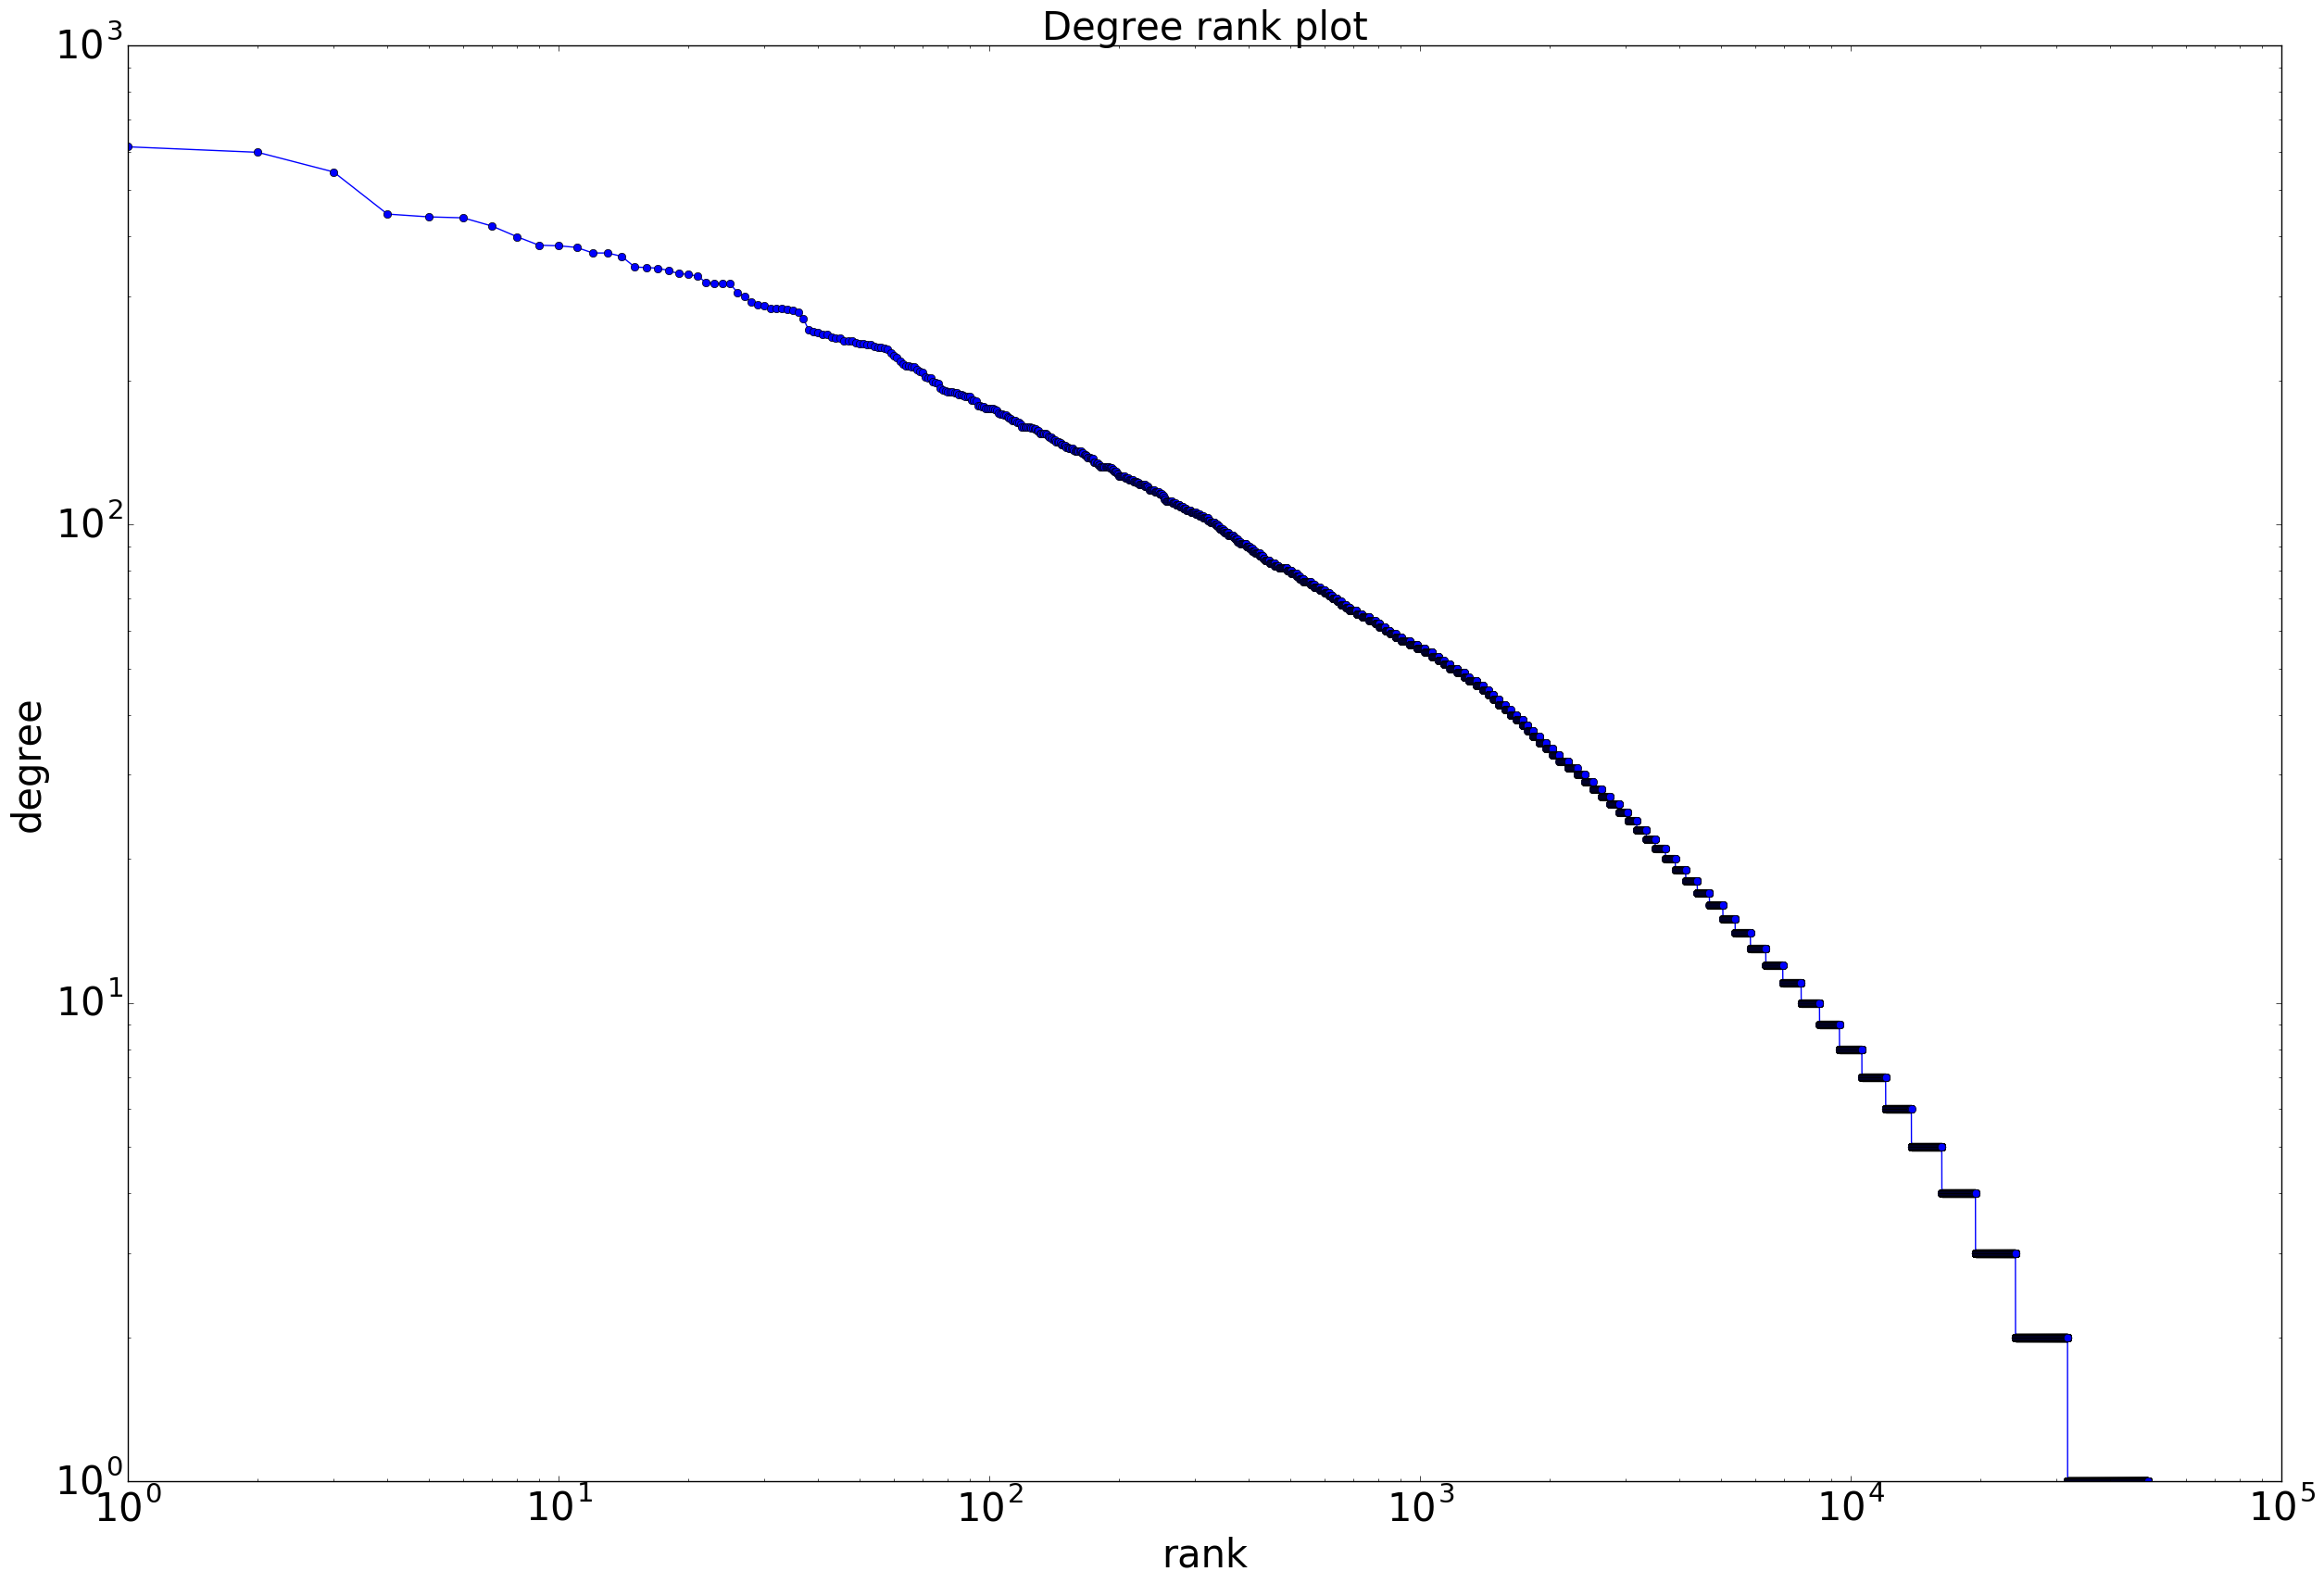

In [37]:
# degree rank
degree_sequence=sorted(nx.degree(G).values(),reverse=True)
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

In [39]:
degree_sequence=sorted(nx.degree(G).values())
hist={}
for d in degree_sequence:
    if d in hist:
        hist[d]+=1
    else:
        hist[d]=1

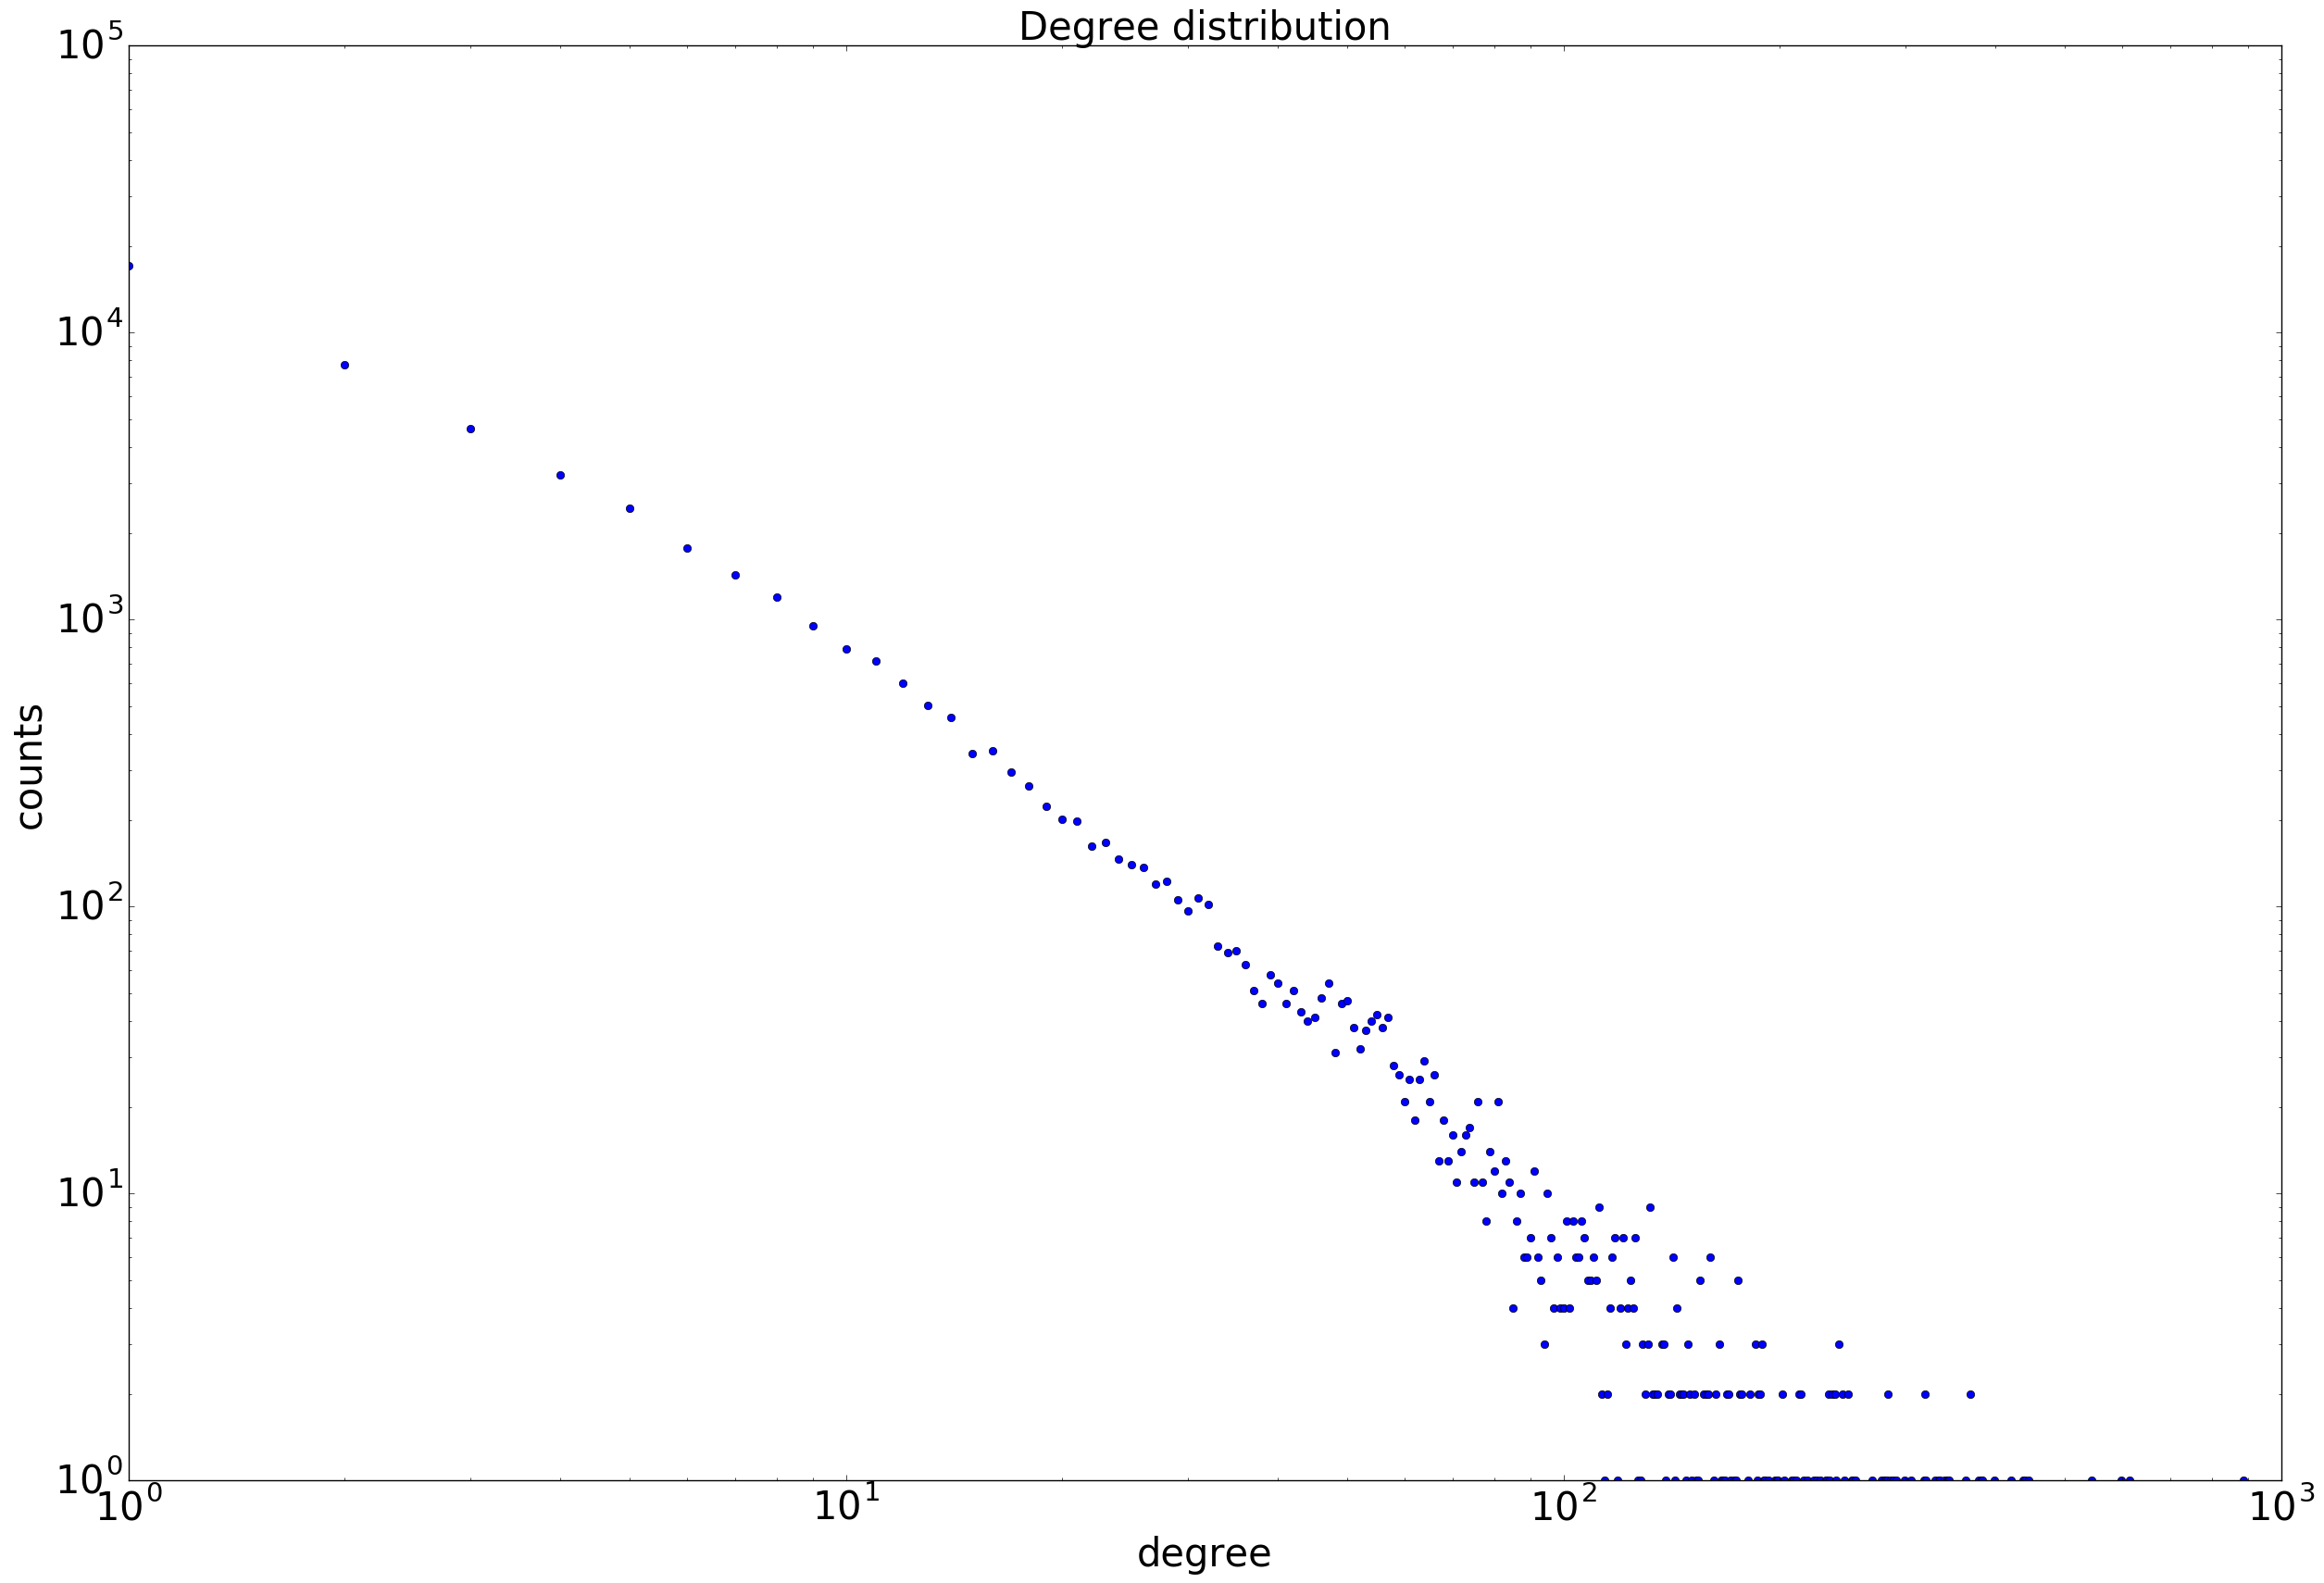

In [27]:
# degree dist
plt.loglog(list(hist.keys()), list(hist.values()),'bo')
plt.title("Degree distribution")
plt.ylabel("counts")
plt.xlabel("degree")
plt.savefig('data/wot_degree_distribution.png')
plt.show()

In [40]:
hist_frac = {}
for d in hist.keys():
    hist_frac[d] = hist[d] / size

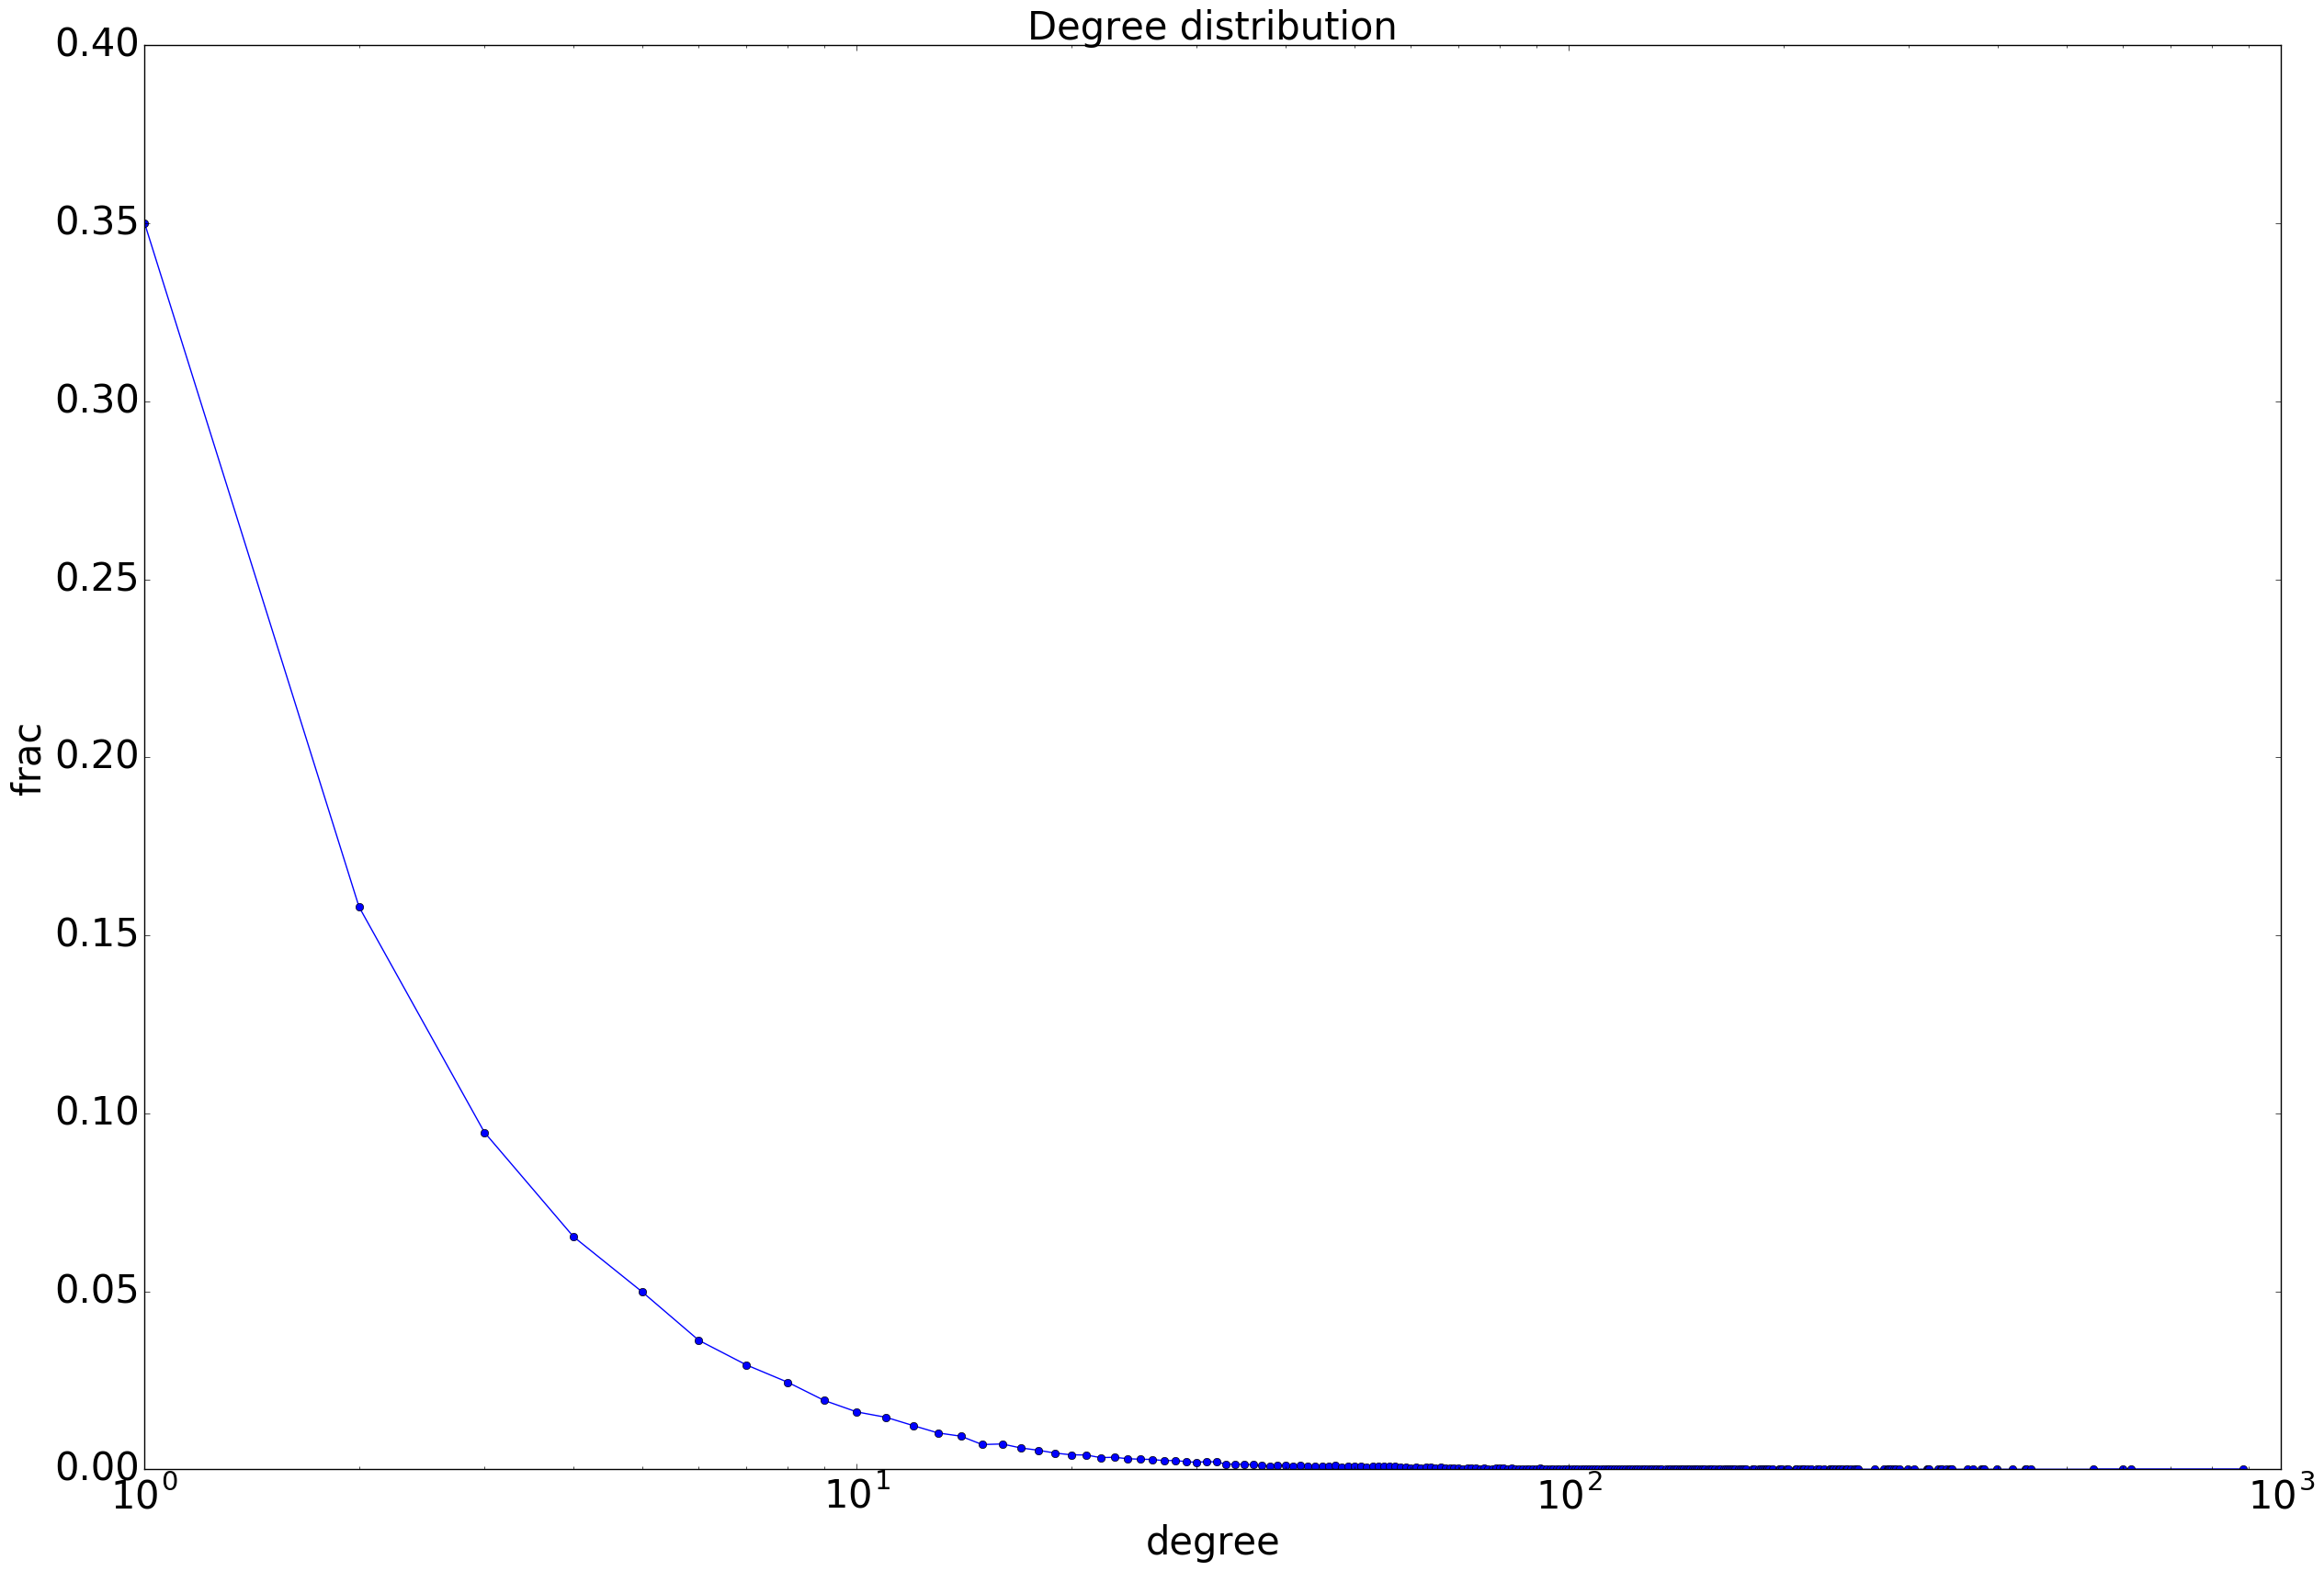

In [41]:
plt.semilogx(list(hist_frac.keys()), list(hist_frac.values()),'b-',marker='o')
plt.title("Degree distribution")
plt.ylabel("frac")
plt.xlabel("degree")
plt.show()